In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
df = pd.read_csv("data.csv")
df.head()

,Pays,Dépense étrangère dans le pays pour le tourisme ($US2021),Dépense internationale pour les voyages à l'étranger ($US2021),Hôtes locaux (hôtels),Hôtes étrangers (hôtels),Nombre moyen de nuits passées par les touristes étrangers,Nombre de voyages des habitants dans un autre endroit du pays par an,Nombre de passagers aériens,Touristes annuels,Nombre d'employés dans le tourisme pour 1000 habitants,Nombre de départs à l'étranger par an pour 1000 habitants,Nombre d'employés dans la restauration pour 1000 habitants,Nombre de voyages d'une seule journée depuis l'étranger pour 1000 habitants,PIB / habitant,Population
0,Albania,5.166606e+09,1876012300,430000.0,736000.0,3.0,NaN,307741.0,6128000.0,18.0,NaN,NaN,96.4,13653,"2,402,113"
1,Algeria,NaN,676212350,3719000.0,NaN,2.0,NaN,6752002.0,NaN,7.4,132.4,NaN,NaN,11627,"46,700,000"
2,Argentina,NaN,8320167400,16289000.0,NaN,2.0,1.0,19461376.0,NaN,28.0,202.7,11.3,NaN,22072,"47,067,441"
3,Australia,4.483945e+10,36791038000,40088000.0,4515000.0,NaN,4.6,76850600.0,NaN,27.5,NaN,10.6,NaN,49421,"27,122,411"
4,Austria,2.853797e+10,12283111000,11144000.0,22662000.0,3.0,1.5,46476600.0,31884000.0,23.2,1340.2,NaN,NaN,5577,"9,179,693"


# Valeur manquante 

In [6]:
print(df.isnull().sum())

Pays                                                                            0
Dépense étrangère dans le pays pour le tourisme ($US2021)                       7
Dépense internationale pour les voyages à l'étranger ($US2021)                  0
Hôtes locaux (hôtels)                                                           9
Hôtes étrangers (hôtels)                                                       16
Nombre moyen de nuits passées par les touristes étrangers                      14
Nombre de voyages des habitants dans un autre endroit du pays par an           21
Nombre de passagers aériens                                                     3
Touristes annuels                                                              20
Nombre d'employés dans le tourisme pour 1000 habitants                         19
Nombre de départs à l'étranger par an pour 1000 habitants                      18
Nombre d'employés dans la restauration pour 1000 habitants                     26
Nombre de voyage

# Lien entre le nombre de passagers aériens et le nombre de touristes annuels.

In [10]:
df1 = df[['Nombre de passagers aériens', 'Touristes annuels']]
df1.head()

,Nombre de passagers aériens,Touristes annuels
0,307741.0,6128000.0
1,6752002.0,NaN
2,19461376.0,NaN
3,76850600.0,NaN
4,46476600.0,31884000.0


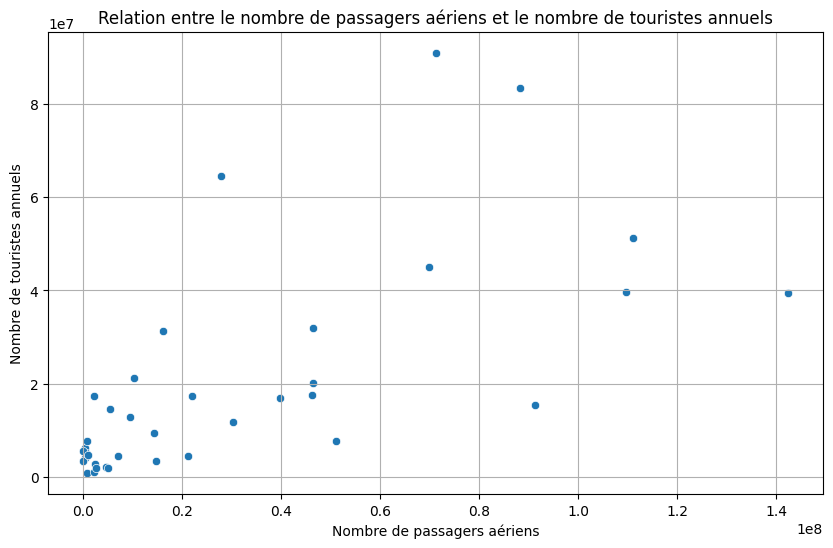

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nombre de passagers aériens', y='Touristes annuels', data=df1)
plt.title("Relation entre le nombre de passagers aériens et le nombre de touristes annuels")
plt.xlabel("Nombre de passagers aériens")
plt.ylabel("Nombre de touristes annuels")
plt.grid(True)
plt.show()

### Analyse de la relation entre accessibilité aérienne et développement des infrastructures touristiques.


L'objectif ici est d'explorer la relation entre le nombre de passagers aériens et le nombre d'hôtes locaux et étrangers. Cette analyse peut montrer si les pays avec une meilleure accessibilité aérienne ont également des infrastructures hôtelières plus développées.

In [8]:
df2 = df[['Nombre de passagers aériens', 'Hôtes locaux (hôtels)', 'Hôtes étrangers (hôtels)']].dropna()


On ajoute une colonne pour le total des hôtes (locaux + étrangers).

In [9]:
df2['Total Hôtes (hôtels)'] = df['Hôtes locaux (hôtels)'] + df['Hôtes étrangers (hôtels)']

Analyse de la corrélation :

Corrélation entre passagers aériens et total des hôtes (hôtels) : 0.73


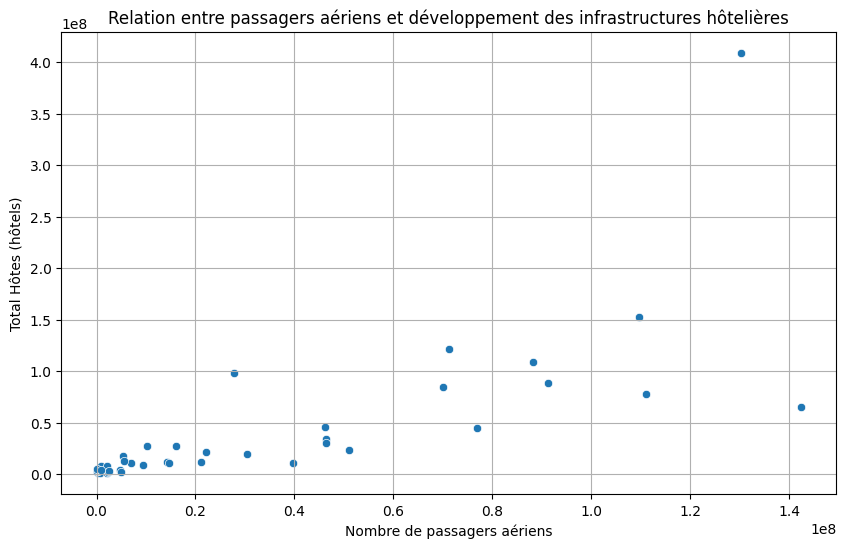

In [12]:

correlation = df2['Nombre de passagers aériens'].corr(df2['Total Hôtes (hôtels)'])
print(f"Corrélation entre passagers aériens et total des hôtes (hôtels) : {correlation:.2f}")

# Visualisation avec un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nombre de passagers aériens', y='Total Hôtes (hôtels)', data=df2)
plt.title("Relation entre passagers aériens et développement des infrastructures hôtelières")
plt.xlabel("Nombre de passagers aériens")
plt.ylabel("Total Hôtes (hôtels)")
plt.grid(True)
plt.show()

On observe une corrélation positive (0.73) entre le nombre de passagers aériens et le développement des infrastructures hôtelières (total des hôtes locaux et étrangers). Cela suggère que les pays ayant une forte accessibilité aérienne tendent à avoir des infrastructures touristiques plus développées, indiquant une probable dépendance de ces pays à l'égard du tourisme aérien pour attirer des visiteurs.

## Étude comparative entre pays dépendants du transport aérien et non aérien

Pour cette analyse, nous allons créer deux groupes de pays :

- Groupe 1 : Pays ayant un fort nombre de passagers aériens.
- Groupe 2 : Pays ayant un fort nombre de voyages d'une seule journée depuis l'étranger.
  
Nous allons comparer certains indicateurs économiques pour ces deux groupes.

In [15]:
df = df[['Nombre de passagers aériens', 
         'Nombre de voyages d\'une seule journée depuis l\'étranger pour 1000 habitants',
         'Touristes annuels', 
         'Dépense étrangère dans le pays pour le tourisme ($US2021)',
         'PIB / habitant']].dropna()


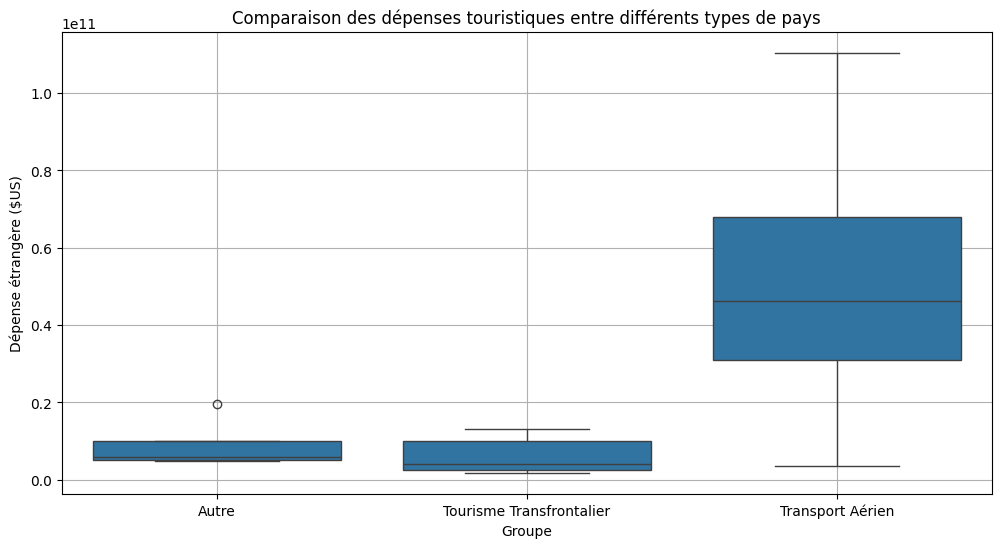

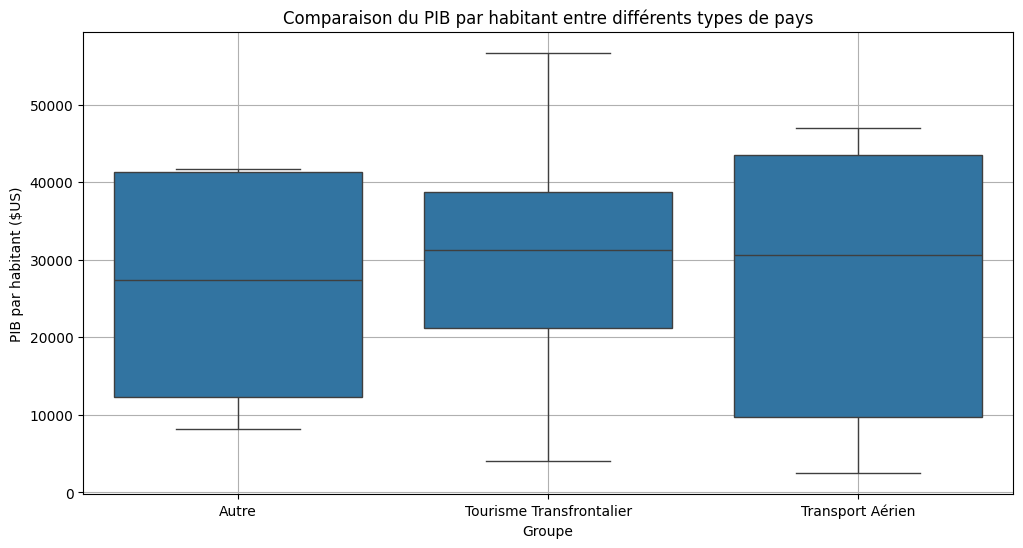

Groupe
Transport Aérien            12
Tourisme Transfrontalier     8
Autre                        4
Name: count, dtype: int64


In [16]:
threshold_air = df['Nombre de passagers aériens'].median()
threshold_day_trip = df['Nombre de voyages d\'une seule journée depuis l\'étranger pour 1000 habitants'].median()

# Créer deux groupes
df['Groupe'] = df.apply(lambda x: 'Transport Aérien' if x['Nombre de passagers aériens'] > threshold_air 
                        else 'Tourisme Transfrontalier' if x['Nombre de voyages d\'une seule journée depuis l\'étranger pour 1000 habitants'] > threshold_day_trip 
                        else 'Autre', axis=1)

# Comparer les indicateurs économiques entre les deux groupes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Groupe', y='Dépense étrangère dans le pays pour le tourisme ($US2021)', data=df)
plt.title("Comparaison des dépenses touristiques entre différents types de pays")
plt.ylabel("Dépense étrangère ($US)")
plt.grid(True)
plt.show()

# Analyse comparative du PIB par habitant
plt.figure(figsize=(12, 6))
sns.boxplot(x='Groupe', y='PIB / habitant', data=df)
plt.title("Comparaison du PIB par habitant entre différents types de pays")
plt.ylabel("PIB par habitant ($US)")
plt.grid(True)
plt.show()

# Afficher la répartition des groupes
print(df['Groupe'].value_counts())

Les pays fortement dépendants du transport aérien ont des dépenses touristiques significativement plus élevées par rapport aux pays avec un tourisme transfrontalier ou d'autres types de tourisme. Cela indique que ces pays attirent des touristes qui dépensent davantage, probablement en raison de séjours plus longs ou de voyages plus coûteux.

Les pays du groupe "Transport Aérien" montrent une large variabilité du PIB par habitant, mais en général, ils ont un PIB médian similaire voire supérieur à celui des autres groupes. Cela suggère que l'accessibilité aérienne peut être liée à un niveau économique plus élevé, soit en attirant des touristes de plus grande valeur ajoutée, soit en étant une conséquence du développement économique général.